In [1]:
import time

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [2]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300

# import scienceplots
# plt.style.use(['science', 'no-latex'])

## Create Model

### Load Data

In [3]:
df_train = pd.read_parquet("../dataset/merged/train.parquet")
df_test = pd.read_parquet("../dataset/merged/test.parquet")

In [4]:
sel_cols = ["distance", "po4_mean", "pbo_mean", "slope_mean", "aspect_mean"]

X_train, y_train = df_train[sel_cols], df_train["target"]
X_test, y_test = df_test[sel_cols], df_test["target"]

In [ ]:
n_neg = y_train[y_train == 0].shape[0]
n_pos = y_train[y_train == 1].shape[0]

n_neg/n_pos

82.52327845052298

### Training

In [6]:
clf = XGBClassifier(random_state=42, max_depth=10, n_estimators=100, scale_pos_weight=n_neg/n_pos)

st = time.time()
clf.fit(X_train, y_train)
dt = time.time() - st

print("Time:", np.round(dt, 4))

Time: 9.4147


### Evaluation

In [7]:
st = time.time()
y_pred = clf.predict(X_test)
dt = time.time() - st

print("Time:", np.round(dt, 4))
print("MCC:", np.round(matthews_corrcoef(y_test, y_pred), 4))
print("Accuracy:", np.round(accuracy_score(y_test, y_pred), 4))
print("Precision:", np.round(precision_score(y_test, y_pred), 4))
print("Recall:", np.round(recall_score(y_test, y_pred), 4))
print("F1:", np.round(f1_score(y_test, y_pred), 4))

print(classification_report(y_test, y_pred))

Time: 0.2228
MCC: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    625258
           1       1.00      1.00      1.00      7577

    accuracy                           1.00    632835
   macro avg       1.00      1.00      1.00    632835
weighted avg       1.00      1.00      1.00    632835



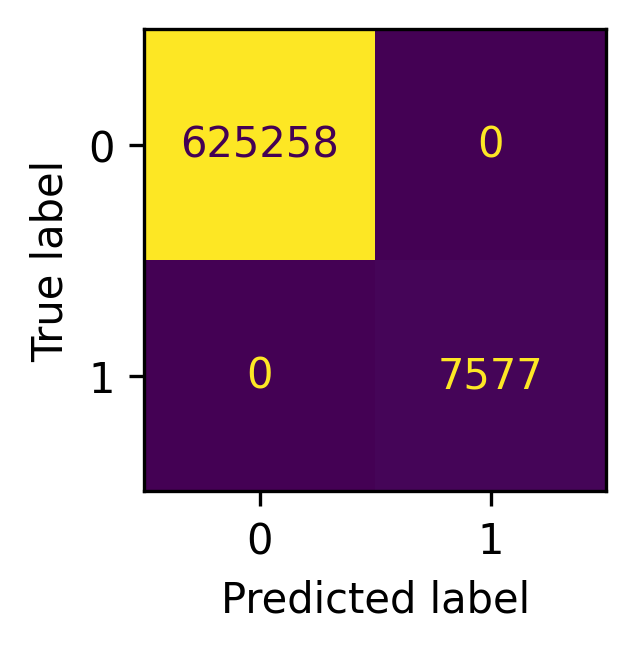

In [8]:
fig, ax = plt.subplots(figsize=(2, 2))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, colorbar=False)

## Inference

### Load Data

In [9]:
gdf_africa = gpd.read_file("../dataset/africa/shp/grid-sea-africa-zoned.shp")
gdf_australia = gpd.read_file("../dataset/australia/shp/grid-sea-australia-zoned.shp")

In [10]:
df_africa = pd.read_parquet("../dataset/zonal/africa.parquet")
df_australia = pd.read_parquet("../dataset/zonal/australia.parquet")

### Visualize Maps

In [11]:
df_africa[df_africa["ts"].dt.year == 2021]

,ts,zone_id,fe_sum,fe_mean,phyc_sum,phyc_mean,aspect_sum,aspect_mean,o2_sum,o2_mean,...,chl_mean,dissic_sum,dissic_mean,so_sum,so_mean,slope_sum,slope_mean,wo_sum,wo_mean,target
0,2021-11-01,135,0.006052,0.002017,22.354584,7.451528,153437.046875,187.118347,744.345337,248.115112,...,1.148334,6.256105,2.085368,70.404289,35.202145,1023.873779,1.247106,-3.447930e-06,-1.723965e-06,1
1,2021-11-01,178,0.003837,0.001919,12.968587,6.484293,174309.437500,189.672943,489.054138,244.527069,...,0.891831,4.166602,2.083301,106.044907,35.348301,564.912231,0.614703,-6.331736e-07,-2.110579e-07,1
2,2021-11-01,198,0.001366,0.001366,8.292331,8.292331,800326.500000,155.493790,247.121826,247.121826,...,1.305972,2.089406,2.089406,425.229065,35.435757,891.913818,0.172051,9.710706e-06,8.092255e-07,1
3,2021-11-01,208,0.000855,0.000855,9.266356,9.266356,895036.625000,173.861038,246.176193,246.176193,...,1.719356,2.089865,2.089865,318.807159,35.423019,1427.001221,0.276443,8.497441e-06,9.441601e-07,1
4,2021-11-01,218,0.001711,0.000856,18.170242,9.085121,951370.875000,185.380142,484.133545,242.066772,...,1.802901,4.177331,2.088666,424.632935,35.386078,1245.212646,0.241320,1.697704e-05,1.414753e-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51487,2021-11-24,8586,0.000039,0.000039,0.810486,0.810486,706261.125000,136.238647,233.810272,233.810272,...,0.059746,2.099152,2.099152,106.829887,35.609962,36005.789062,6.945561,-1.543845e-06,-5.146148e-07,0
51488,2021-11-24,8587,0.000040,0.000040,0.824642,0.824642,639538.562500,123.367775,234.299835,234.299835,...,0.061897,2.098795,2.098795,142.543228,35.635807,29873.111328,5.762560,-4.033516e-07,-1.008379e-07,0
51489,2021-11-24,8588,0.000041,0.000041,0.823597,0.823597,627681.062500,121.080452,234.344528,234.344528,...,0.061159,2.098289,2.098289,142.547653,35.636913,28557.076172,5.508695,-6.599547e-08,-1.649887e-08,0
51490,2021-11-24,8589,0.000097,0.000049,1.626728,0.813364,565831.500000,109.149597,468.405548,234.202774,...,0.060304,4.194316,2.097158,106.771545,35.590515,22085.207031,4.260264,4.550554e-07,1.516851e-07,0


In [12]:
sel_date = "2021-11-01"

viscols = X_train.columns.tolist() + ["target", "ts", "zone_id"]
df_visualize = pd.concat([
    df_africa[df_africa["ts"] == sel_date][viscols].assign(country="africa"),
    df_australia[df_australia["ts"] == sel_date][viscols].assign(country="australia"),
], ignore_index=True)

df_visualize.head()

,distance,po4_mean,pbo_mean,slope_mean,aspect_mean,target,ts,zone_id,country
0,0.000000,0.186000,46.310219,1.247106,187.118347,1,2021-11-01,135,africa
1,0.000000,0.187016,34.367500,0.614703,189.672943,1,2021-11-01,178,africa
2,0.026595,0.217994,60.579197,0.172051,155.493790,1,2021-11-01,198,africa
3,0.000000,0.240391,78.498070,0.276443,173.861038,1,2021-11-01,208,africa
4,0.000000,0.245761,94.296448,0.241320,185.380142,0,2021-11-01,218,africa


In [13]:
df_visualize["country"].value_counts()

country
africa       7356
australia    3676
Name: count, dtype: int64

In [14]:
X_vis = df_visualize.drop(columns=["target", "ts", "zone_id", "country"])
y_vis = df_visualize["target"]

pred = clf.predict(X_vis)
prob = clf.predict_proba(X_vis)
prob[prob == 0] = np.finfo(float).eps

df_pred = df_visualize[["zone_id", "country", "target"]].copy()
df_pred["class_pred"] = pred
df_pred["class_prob"] = np.log(prob[:, 1])

df_pred.head()

,zone_id,country,target,class_pred,class_prob
0,135,africa,1,1,-0.000008
1,178,africa,1,1,-0.000014
2,198,africa,1,1,-0.000010
3,208,africa,1,1,-0.000020
4,218,africa,0,0,-10.188728


In [15]:
sel_col = ["ZONE_ID", "zone_id", "country", "target", "class_pred", "class_prob", "geometry"]

df_pred_afr = df_pred[df_pred["country"] == "africa"].copy()
gdf_pred_afr = gdf_africa.merge(df_pred_afr, left_on="ZONE_ID", right_on="zone_id", how="left")[sel_col].dropna()

df_pred_aus = df_pred[df_pred["country"] == "australia"].copy()
gdf_pred_aus = gdf_australia.merge(df_pred_aus, left_on="ZONE_ID", right_on="zone_id", how="left")[sel_col].dropna()

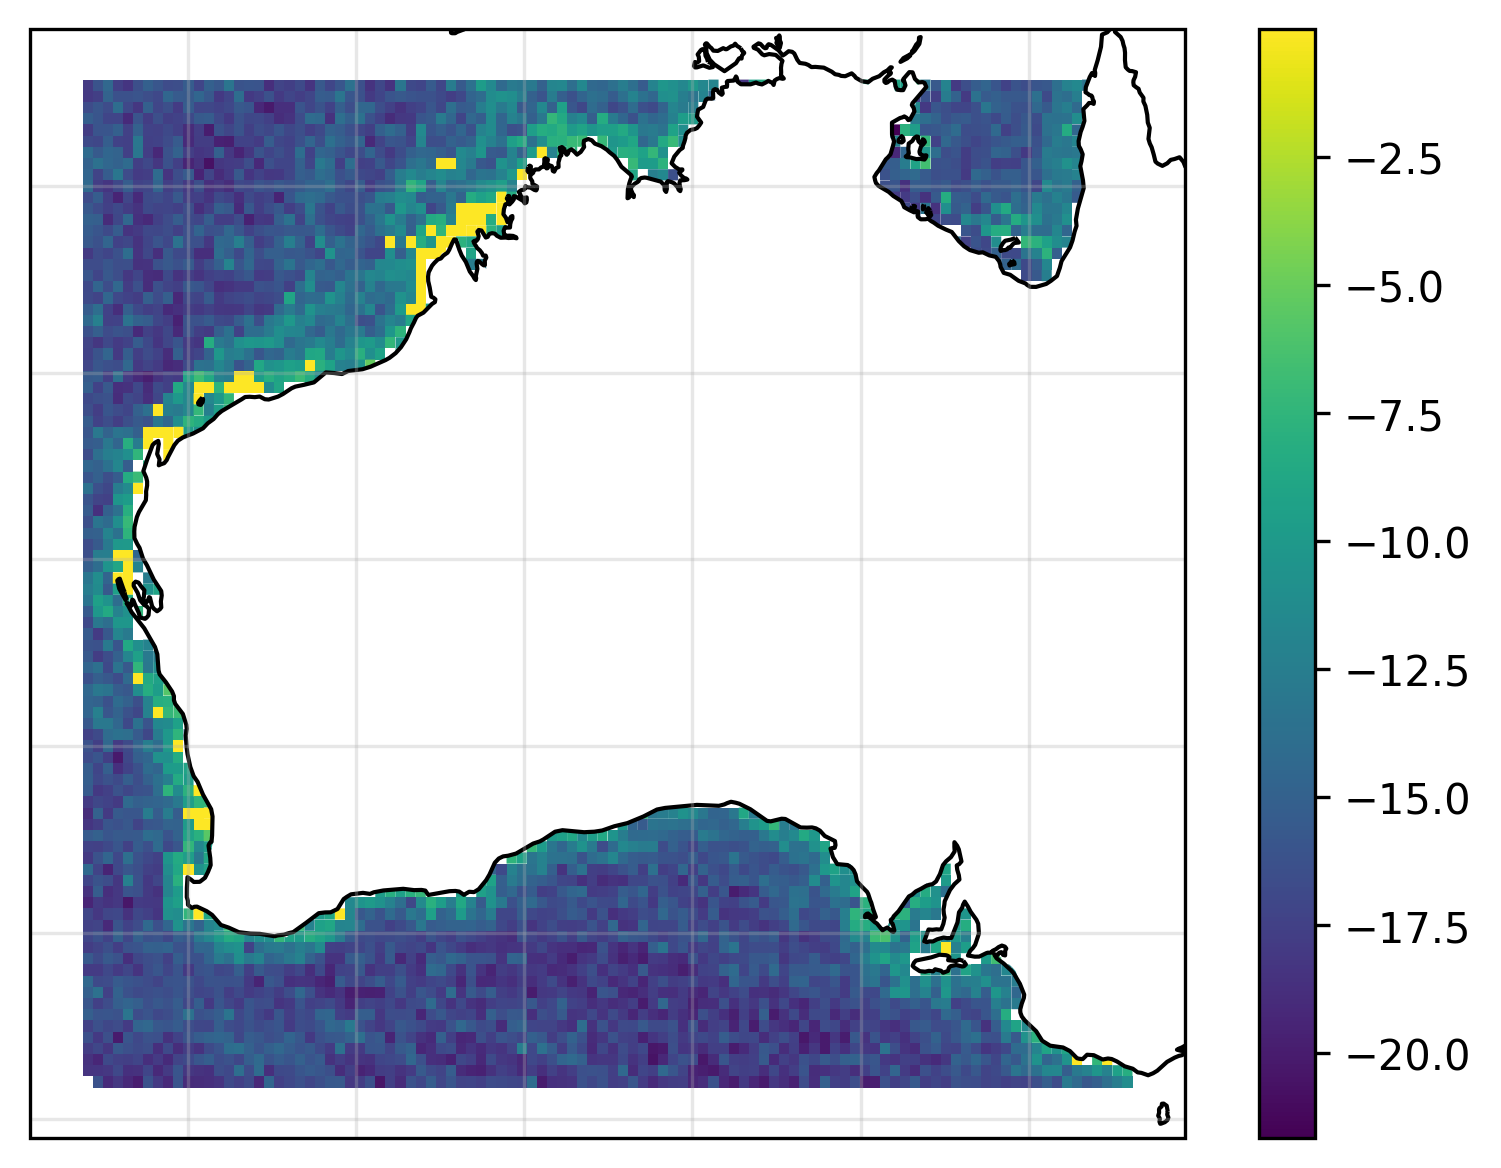

In [16]:
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})

ax.coastlines()
ax.gridlines(draw_labels=False, dms=False, x_inline=False, y_inline=False, alpha=0.3)
gdf_pred_aus.plot(ax=ax, column="class_prob", legend=True)

fig.savefig("FIG-14c2.jpg")
fig.savefig("FIG-14c2.pdf")

plt.show()

## Create GeoJSON for Web App

In [22]:
def create_geojson(clf: XGBClassifier, df_environ: pd.DataFrame, gdf_zones: gpd.GeoDataFrame):
    # summarize over month
    df_map_exp = df_environ[df_environ["ts"].dt.year == 2023].groupby(["zone_id", df_environ["ts"].dt.month])[sel_cols].mean().dropna().reset_index()

    # run predictions
    df_map_exp["pred_class"] = clf.predict(df_map_exp[sel_cols])
    df_map_exp["pred_proba"] = np.log(clf.predict_proba(df_map_exp[sel_cols])[:, 1])

    # remove absence
    df_map_exp = df_map_exp[df_map_exp["pred_class"] == 1]

    # select zone
    gdf_map_zones = gdf_zones[["ZONE_ID", "geometry"]].copy().rename(columns={"ZONE_ID": "zone_id"})

    # merge    
    return gpd.GeoDataFrame(pd.merge(df_map_exp, gdf_map_zones, on="zone_id"))

In [23]:
df_con = create_geojson(clf, df_africa, gdf_africa)
df_con.to_file("africa.json", driver="GeoJSON")
df_con.head()

,zone_id,ts,distance,po4_mean,pbo_mean,slope_mean,aspect_mean,pred_class,pred_proba,geometry
0,135,5,0.0,0.243651,46.242850,1.247106,187.118347,1,-0.000004,"POLYGON ((24.01476 -34.06368, 23.71476 -34.063..."
1,135,6,0.0,0.276018,46.317928,1.247106,187.118347,1,-0.000004,"POLYGON ((24.01476 -34.06368, 23.71476 -34.063..."
2,135,7,0.0,0.249807,46.278481,1.247106,187.118347,1,-0.000004,"POLYGON ((24.01476 -34.06368, 23.71476 -34.063..."
3,135,8,0.0,0.213921,46.276720,1.247106,187.118347,1,-0.000004,"POLYGON ((24.01476 -34.06368, 23.71476 -34.063..."
4,135,9,0.0,0.179041,46.281578,1.247106,187.118347,1,-0.000008,"POLYGON ((24.01476 -34.06368, 23.71476 -34.063..."


<Axes: >

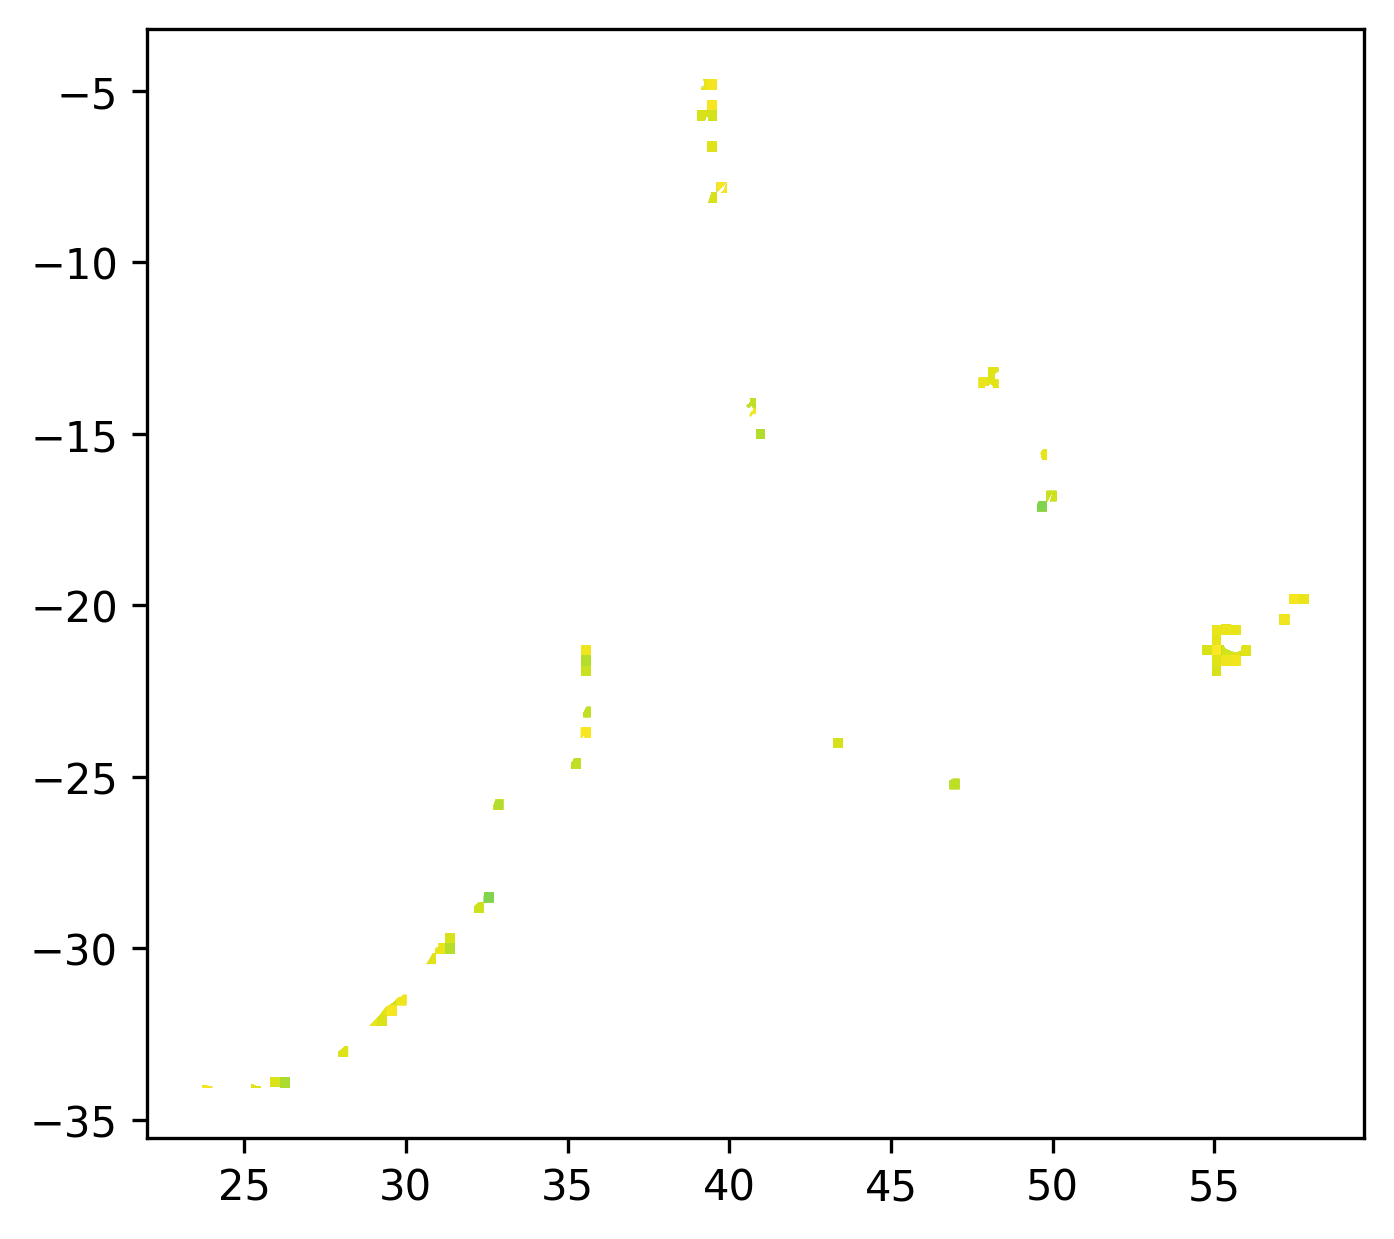

In [24]:
df_con.plot(column="pred_proba")

In [25]:
df_con = create_geojson(clf, df_australia, gdf_australia)
df_con.to_file("australia.json", driver="GeoJSON")
df_con.head()

,zone_id,ts,distance,po4_mean,pbo_mean,slope_mean,aspect_mean,pred_class,pred_proba,geometry
0,613,5,0.417826,0.083714,78.047223,0.091801,214.301849,1,-0.000028,"POLYGON ((113.07449 -24.75167, 113.07449 -25.0..."
1,613,6,0.417826,0.093021,77.958858,0.091801,214.301849,1,-0.000020,"POLYGON ((113.07449 -24.75167, 113.07449 -25.0..."
2,613,7,0.417826,0.098267,77.956065,0.091801,214.301849,1,-0.000015,"POLYGON ((113.07449 -24.75167, 113.07449 -25.0..."
3,613,8,0.417826,0.099158,77.903328,0.091801,214.301849,1,-0.000015,"POLYGON ((113.07449 -24.75167, 113.07449 -25.0..."
4,613,9,0.417826,0.101917,77.872770,0.091801,214.301849,1,-0.000017,"POLYGON ((113.07449 -24.75167, 113.07449 -25.0..."


<Axes: >

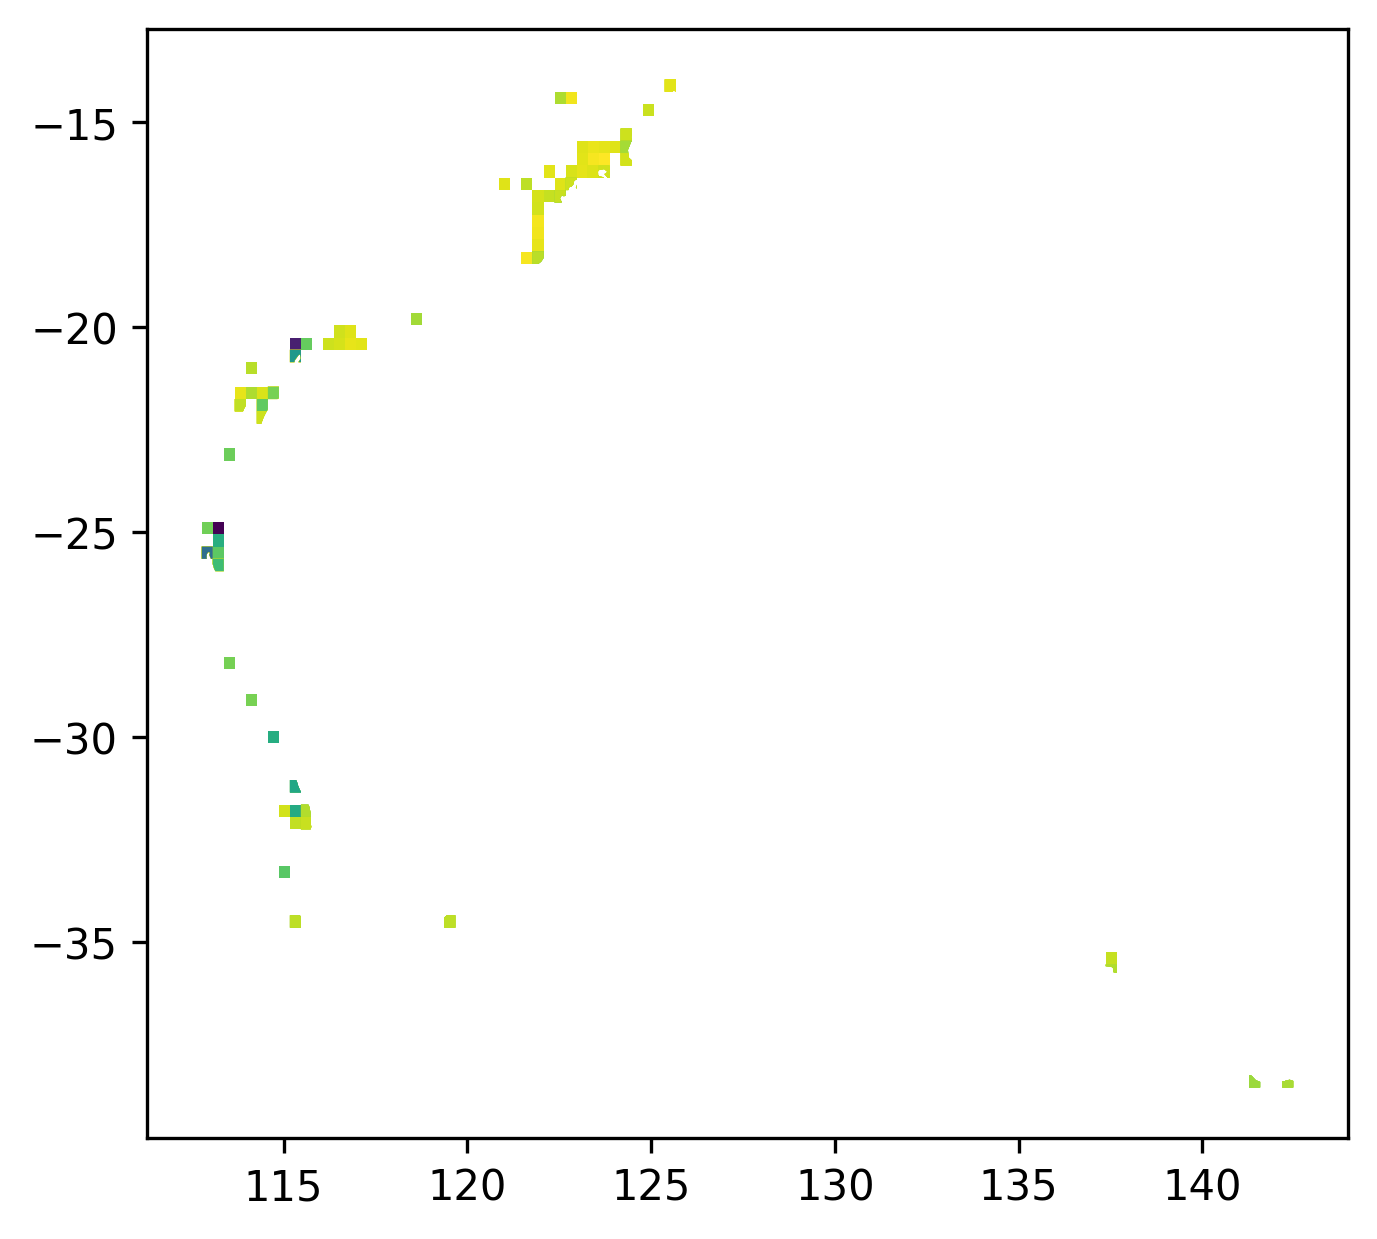

In [26]:
df_con.plot(column="pred_proba")